In [102]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from math import exp, log,sqrt
from sympy import Symbol, diff, erf, sqrt, init_printing, ln, exp, diff, lambdify
import matplotlib.pyplot as plt

%matplotlib inline
class Stock:
    def __init__(self,ticker):
        self.ticker1 = ticker
        self.ticker = yf.Ticker(ticker)
        lastDay= self.ticker.history(period="1d")
        lastDay = lastDay['Close'][0]
        lastDay = round(lastDay,2)
        self.price = lastDay
    def getCurrPrice(self):
        return self.price
   # def get2DSMA(self):
        
  #  def get10DSMA(self):

 #   def MACD(self):

    def getTicker(self):
        return self.ticker1

#    def BollingerBands(self):  
#        price = self.price
#        df = self.ticker.history(period='6m')[['Close']]
#        print(df['Close'])
#        sma20D = df['Close'].rolling(window = 20).mean()
#        print(sma20D)
#        mean = np.mean(sma20D)
#        std =  np.std(sma20D)
#        lowerBand = self.price - (2 * std)
#        upperBand = self.price + (2 * std)
#        print(upperBand)
#        print(lowerBand)
#        if self.price >= upperBand:
#            return "Bullish"
#        elif self.price <=lowerBand:
#            return "Bearish"
#        else:
#            return "null"
        
   # def rsi(self):


    def getCompanyInfo(self):
        info = self.ticker.info['longBusinessSummary']
        return info

    def get1dChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "1d")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan
    def get5dChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "5d")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan
    def get1mChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "1mo")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan
    def get6mChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "6mo")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan
    def get1yChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "1y")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan

    def get5yChange(self):
        try:
            recent = self.price
            old = self.ticker.history(period = "5y")
            old = old['High'][0]
            percentChange = ((recent-old)/old)*100
            percentChange = round(percentChange,4)
            return percentChange
        except:
            return np.nan









In [103]:
class ProfitableSort:
    def __init__(self,tickerArray):
        arr = []
        arr1 = []
        for j in range(len(tickerArray)):
            arr.append(tickerArray[j])
            arr1.append(tickerArray[j].get1mChange())
        self.array = arr
        self.sortedArray = arr1
    def getSpecificTicker(self,ticker):
        arr = self.array
        for i in range(len(self.array)):
            if(ticker == arr[i].getTicker()):
                data = {'Ticker':[arr[i].getTicker()],'1 Day %Change':[arr[i].get1dChange()],'5 Day %Change':[arr[i].get5dChange()],'1 Month %Change':[arr[i].get1mChange()],'6 Month %Change' :[arr[i].get6mChange()]
                ,'1 Year %Change':[arr[i].get1yChange()], '5 Year %Change':[arr[i].get5yChange()]}
                df = pd.DataFrame(data)
                return df
        return "There is no Ticker in this dataframe"
    def display(self):
        arr = self.array
        df = pd.DataFrame(columns = ['Ticker','1 Day %Change','5 Day %Change','1 Month %Change','6 Month %Change' ,'1 Year %Change', '5 Year %Change'])
        for c in range(len(arr)):
            df = df.append({'Ticker':arr[c].getTicker(),'1 Day %Change':arr[c].get1dChange(),'5 Day %Change':arr[c].get5dChange(),'1 Month %Change':arr[c].get1mChange(),'6 Month %Change':arr[c].get6mChange(),'1 Year %Change':arr[c].get1yChange(),'5 Year %Change':arr[c].get5yChange()},ignore_index = True)
        return df
    def mergeSort(myList):
        if len(myList) > 1:
            mid = len(myList) // 2
            left = myList[:mid]
            right = myList[mid:]

            # Recursive call on each half
            self.mergeSort(left)
            self.mergeSort(right)

            # Two iterators for traversing the two halves
            i = 0
            j = 0
        
            # Iterator for the main list
            k = 0
        
            while i < len(left) and j < len(right):
                if left[i].get1mChange() <= right[j].get1mChange():
                    # The value from the left half has been used
                    myList[k] = left[i]
                    # Move the iterator forward
                    i += 1
                else:
                    myList[k] = right[j]
                    j += 1
                # Move to the next slot
                k += 1

            # For all the remaining values
            while i < len(left):
                myList[k] = left[i]
                i += 1
                k += 1

            while j < len(right):
                myList[k]=right[j]
                j += 1
                k += 1
        newList = []
        for p in range(len(myList)):
            newList.append(Stock(myList[len(myList)-1 -p].getTicker()))

        df = pd.DataFrame(columns = ['Ticker','1 Day %Change','5 Day %Change','1 Month %Change','6 Month %Change' ,'1 Year %Change', '5 Year %Change'])
        for c in range(len(newList)):
            df = df.append({'Ticker':newList[c].getTicker(),'1 Day %Change':newList[c].get1dChange(),'5 Day %Change':newList[c].get5dChange(),'1 Month %Change':newList[c].get1mChange(),'6 Month %Change':newList[c].get6mChange(),'1 Year %Change':newList[c].get1yChange(),'5 Year %Change':newList[c].get5yChange()},ignore_index = True)
        return df

    

    #def merge(self,left,right):

    #def mergeSort(self):
        

In [104]:
class Options:
    def __init__(self,ticker, strikePrice, timeToExpiration,riskFreeRate):
        self.ticker = ticker
        self.stockOptionData = yf.Ticker(ticker)
        lastDay= self.stockOptionData.history(period="1d")
        lastDay = lastDay['Close'][0]
        lastDay = round(lastDay,2)
        self.S = float(lastDay)
        self.K = float(strikePrice)
        self.T = float(timeToExpiration)
        self.r = riskFreeRate
        symbols = [self.ticker, 'SPY']
        data = yf.download(symbols,'2021-6-2')['Adj Close']
        price_change = data.pct_change()
        df = price_change.drop(price_change.index[0])
        x = np.array(df[self.ticker]).reshape((-1,1))
        y = np.array(df['SPY'])
        model = LinearRegression().fit(x,y)
        self.sigma = float(model.coef_[0])
        self.d1 = 0.0
        self.d2 = 0.0
        self.callPrice = 0.0 
        self.putPrice = 0.0
            

    #K = Strike Price
    #St = Price of Asset
    #t = time to maturity
    # o = volatility of the asset
    #r = risk-free interest rate
    #Call Option Price = normcdf(d1)*St - normcdf(d2)*Ke^(-rt)
    #Put Option Price = Ke^(-rt) * N(-d2) - S0N(-d1)
    #d1 = (ln(St/K)+(r+(o^2/2))*t)/(o*√t)
    #d2 = d1 - o*√t

    def findD1(self):
        self.d1 = ((np.log(self.S / self.K)) + ((self.r + self.sigma ** 2.0)//2) * self.T)/(self.sigma * np.sqrt(self.T))
        return self.d1
    def findD2(self):
        self.d2 = self.findD1() - self.sigma * sqrt(self.T)
        return self.d2
    #Returns call Option Price
    def calculateIdealCall(self):
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(self.T)),
            np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * self.T )
        d2 = d1 - self.sigma * np.sqrt(self.T)
        self.call = np.multiply(self.S, norm.cdf(d1)) - \
            np.multiply(norm.cdf(d2) * self.K, np.exp(-self.r * self.T))
        return self.call
    # Returns put Option Price
    def calculateIdealPut(self):
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(self.T)),  np.log(self.S/self.K) + (self.r + self.sigma**2 / 2.) * self.T)
        d2 = d1 - self.sigma * np.sqrt(self.T)
        self.put = -np.multiply(self.S, norm.cdf(-d1)) + \
        np.multiply(norm.cdf(-d2) * self.K, np.exp(-self.r * self.T))
        return self.put

    def getTimeGreeks(self):
        S = Symbol('S', real = True)
        K = Symbol('K', real = True)
        r = Symbol('r', real = True)
        t = Symbol('t', real = True)
        sigma = Symbol('sigma', real = True)
        d1 = 1 / (sigma * sqrt(t)) * (ln(S/K) + (r + sigma**2 / 2) * t)
        d2 = d1 - sigma * sqrt(t)
        C = S * 0.5 * (1 + erf(d1 / sqrt(2))) - K * exp(-r * t) * 0.5 * (1 + erf(d2 / sqrt(2)))
        dt1 = diff(C,t)
        dt2 = diff(dt1,t)
        dt3 = diff(dt2,t)
        dt4 = diff(dt3,t)
        dt5 = diff(dt4,t)
        dt6 = diff(dt5,t)  
        dt7 = diff(dt6,t)  
        dt8 = diff(dt7,t) 
        dt9 = diff(dt8,t)   
        output0 = lambdify((sigma, S,K,r,t),C)  
        output1 = lambdify((sigma, S,K,r,t),dt1)  
        output2 = lambdify((sigma, S,K,r,t),dt2)  
        output3 = lambdify((sigma, S,K,r,t),dt3)  
        output4 = lambdify((sigma, S,K,r,t),dt4)  
        output5 = lambdify((sigma, S,K,r,t),dt5)  
        output6 = lambdify((sigma, S,K,r,t),dt6)  
        output7 = lambdify((sigma, S,K,r,t),dt7)  
        output8 = lambdify((sigma, S,K,r,t),dt8)  
        output9 = lambdify((sigma, S,K,r,t),dt9)  


        return [output0(self.sigma, self.S, self.K, self.r, self.T), 
        output1(self.sigma, self.S, self.K, self.r, self.T), 
        output2(self.sigma, self.S, self.K, self.r, self.T), 
        output3(self.sigma, self.S, self.K, self.r, self.T), 
        output4(self.sigma, self.S, self.K, self.r, self.T), 
        output5(self.sigma, self.S, self.K, self.r, self.T), 
        output6(self.sigma, self.S, self.K, self.r, self.T),
        output7(self.sigma, self.S, self.K, self.r, self.T), 
        output8(self.sigma, self.S, self.K, self.r, self.T), 
        output9(self.sigma,self.S,self.K,self.r,self.T)]


    def makeTaylorApproximationTimeGreeks(self):
        tspan = np.linspace(1, 0,366)
        d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)),
        np.log(self.S/self.K) + (self.r + self.sigma**2 / 2) * tspan)
        d2 = d1 - self.sigma * np.sqrt(tspan)
        call = np.multiply(self.S, norm.cdf(d1)) - \
               np.multiply(norm.cdf(d2) * self.K, np.exp(-self.r * tspan))
        plt.plot(tspan, call, 'k', label = 'Black-Scholes Model')
        plt.xlim(1, 0)
        plt.grid(True)
        plt.xlabel('Time to Expiration (Y)')
        plt.ylabel('Call price ($)')
        timeGreeks = self.getTimeGreeks()
        c0 = timeGreeks[0]
        dt1= timeGreeks[1]
        dt2= timeGreeks[2]
        dt3= timeGreeks[3]
        dt4= timeGreeks[4]
        dt5= timeGreeks[5]
        dt6= timeGreeks[6]
        dt7 = timeGreeks[7]
        dt8 = timeGreeks[8]
        dt9 = timeGreeks[9]
        taylor = c0 + dt1 * (tspan-1)
        taylor = taylor + dt2 / np.math.factorial(2) * (tspan-1)**2
        taylor = taylor + dt3 / np.math.factorial(3) * (tspan-1)**3
        taylor = taylor + dt4 / np.math.factorial(4) * (tspan-1)**4
        taylor = taylor + dt5 / np.math.factorial(5) * (tspan-1)**5
        taylor = taylor + dt6 / np.math.factorial(6) * (tspan-1)**6
        taylor = taylor + dt7 / np.math.factorial(7) * (tspan-1)**7
        taylor = taylor + dt8 / np.math.factorial(8) * (tspan-1)**8
        taylor = taylor + dt9 / np.math.factorial(9) * (tspan-1)**9
        plt.plot(tspan, taylor, 'y', label = 'Taylor Approx')
        plt.legend()   


            
        

    #def makeTaylorApproximation
    ##
        

In [105]:
#stock1 = Stock("AAPL")
#stock2 = Stock("NVDA")
#stock3 = Stock("WMT")
#stock4 = Stock("TSLA")
#stock5 = Stock("AMZN")
#stockList = [stock1, stock2, stock3, stock4, stock5]
#ProfitableSort(stockList).getSpecificTicker("AAPL")

In [106]:
#ProfitableSort(stockList).display()

In [107]:
#ProfitableSort(mergeSort(stockList)).display()

In [108]:
Options('AAPL',155.0,0.4,0.01).calculateIdealCall()

[*********************100%***********************]  2 of 2 completed


15.805099322871285

In [109]:
Options('AAPL',155.0,0.4,0.01).calculateIdealPut()

[*********************100%***********************]  2 of 2 completed


24.80634124591589

[*********************100%***********************]  2 of 2 completed


/var/folders/6m/f_ggljg557xf775dl4rrgffr0000gn/T/ipykernel_13328/2355187007.py:102: RuntimeWarning: divide by zero encountered in true_divide
  d1 = np.multiply( 1. / self.sigma * np.divide(1., np.sqrt(tspan)),


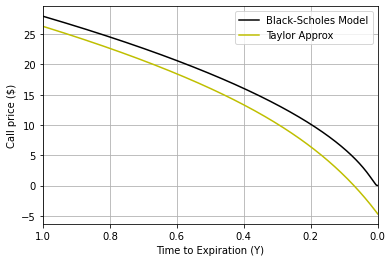

In [112]:
Options('AAPL',155.0,0.9,0.02).makeTaylorApproximationTimeGreeks()